# Prática de k-NN

In [43]:
import pandas as pd

# Carregando o dataset
dataset = pd.read_csv("dataset/skin_segmentation/data.csv", header=None)

class_column = len (dataset.columns) - 1

# Checando os dados
print (dataset)

class_names = pd.unique(dataset[class_column])

# Descobrindo o número de instâncias por classes
for i in class_names:
    print( str(i) + ': ' + str(len (dataset.loc[dataset[class_column] == i])) )

          0    1    2  3
0        74   85  123  1
1        73   84  122  1
2        72   83  121  1
3        70   81  119  1
4        70   81  119  1
5        69   80  118  1
6        70   81  119  1
7        70   81  119  1
8        76   87  125  1
9        76   87  125  1
10       77   88  126  1
11       77   88  126  1
12       77   88  126  1
13       78   89  127  1
14       77   85  125  1
15       78   86  126  1
16       78   86  126  1
17       77   85  125  1
18       76   84  124  1
19       77   85  125  1
20       80   88  128  1
21       83   91  131  1
22       83   91  131  1
23       84   92  132  1
24       84   92  132  1
25       83   91  131  1
26       80   88  128  1
27       78   86  126  1
28       78   86  126  1
29       79   87  127  1
...     ...  ...  ... ..
245027  162  161  110  2
245028  162  161  110  2
245029  162  161  110  2
245030  162  161  110  2
245031  162  161  110  2
245032  162  161  110  2
245033  165  164  113  2
245034  165  164  113  2


In [44]:
from math import sqrt

def euclidean(p, q):
    if len(p) != len (q):
        return -1
    
    local_sum = 0
    for i in range(0, len(p)):
        local_sum += pow(q[i] - p[i], 2)
    
    return sqrt (local_sum)

def manhattan(p, q):
    if len(p) != len (q):
        return -1
    
    local_sum = 0
    for i in range(0, len(p)):
        local_sum += abs(p[i] - q[i])
    
    return local_sum

In [45]:
import numpy as np

# Embaralhando os dados
dataset = dataset.iloc[np.random.permutation(len(dataset))]

# Separando o dataset por classes
skin     = dataset.loc[dataset[class_column] == class_names[0]]
non_skin = dataset.loc[dataset[class_column] == class_names[1]]

part_skin     = skin[0:200]
part_non_skin = non_skin[0:200]

blind_test = pd.concat([    skin[len(skin) - 100     : len(skin)],
                        non_skin[len(non_skin) - 100 : len(non_skin)]])

In [46]:
train_percentage = 0.8

# Obtendo os conjuntos de treino e de testes
trainset = pd.concat([    part_skin[0: int (len(part_skin)     * train_percentage + 1)],
                      part_non_skin[0: int (len(part_non_skin) * train_percentage + 1)]])

testset =  pd.concat([    part_skin[int (len(part_skin)        * train_percentage + 1) : ],
                      part_non_skin[int (len(part_non_skin)    * train_percentage + 1) : ]])

In [47]:
from operator import itemgetter
from collections import Counter

# Criando a função de classificação
def knn(k, train, element, function):
    distance = []
    
    local_class_column = len (train.columns) - 1
    
    for _, row in train.iterrows():
        distance.append((function(row[0:local_class_column], element[0:local_class_column]), row[local_class_column]))
    
    distance.sort(key=itemgetter(0))
    distance = [classes[1] for classes in distance[0:k]]
    
    most_common = Counter(distance)
    #print("Classification: " + max(most_common, key=most_common.get) + ", " + element[4])
    return max(most_common, key=most_common.get)

# Função de avaliação de acurácia
def evaluate(k, train, test):
    acc = 0
    
    local_class_column = len (train.columns) - 1
    
    for _, row in test.iterrows():
        if( knn(k, train, row, euclidean) == row[local_class_column] ):
            acc += 1
    
    return acc / len(test)

# Descobrindo a acurácia para todas as configurações possíveis
def evaluate_by_config(train, test):
    for k in range(1,11):
        print("K = " + str(k) + ", acc = " + str(evaluate(k, train, test)))

In [48]:
# Checando a melhor configuração
evaluate_by_config(trainset, testset)

# Blind test
evaluate_by_config(trainset, blind_test)

K = 1, acc = 0.9743589743589743
K = 2, acc = 0.9743589743589743
K = 3, acc = 0.9743589743589743
K = 4, acc = 0.9743589743589743
K = 5, acc = 0.9358974358974359
K = 6, acc = 0.9358974358974359
K = 7, acc = 0.9358974358974359
K = 8, acc = 0.9358974358974359
K = 9, acc = 0.9230769230769231
K = 10, acc = 0.9230769230769231
K = 1, acc = 0.985
K = 2, acc = 0.985
K = 3, acc = 0.98
K = 4, acc = 0.985
K = 5, acc = 0.915
K = 6, acc = 0.915
K = 7, acc = 0.91
K = 8, acc = 0.91
K = 9, acc = 0.905
K = 10, acc = 0.905


50859
200


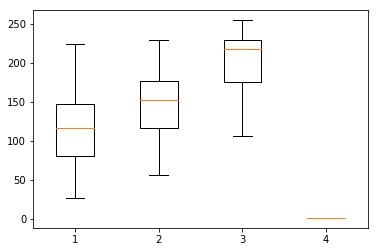

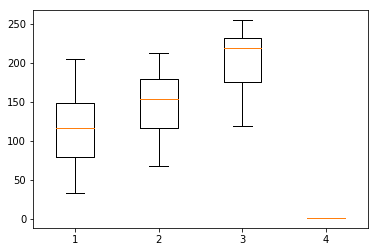

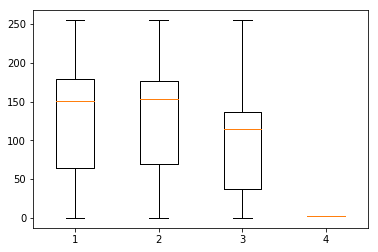

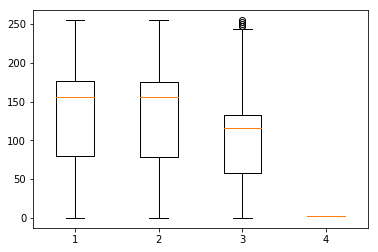

In [40]:
from matplotlib import pyplot as plt

print(len(skin))
print(len(part_skin))

plt.figure(1)
plt.boxplot([skin[0], skin[1], skin[2], skin[3]])

plt.figure(2)
plt.boxplot([part_skin[0], part_skin[1], part_skin[2], part_skin[3]])

plt.figure(3)
plt.boxplot([non_skin[0], non_skin[1], non_skin[2], non_skin[3]])

plt.figure(4)
plt.boxplot([part_non_skin[0], part_non_skin[1], part_non_skin[2], part_non_skin[3]])

plt.show()